In [57]:
import os
import requests
import base64
from typing import Dict, Any, Optional, List
from io import BytesIO
from PIL import Image, ImageEnhance
import json

from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain.tools import BaseTool
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema import SystemMessage, HumanMessage
from openai import OpenAI
from pydantic import BaseModel, Field
import matplotlib.pyplot as plt

In [2]:
class SeismicPromptEnhancer(BaseTool):
    """Tool to enhance geological prompts with seismic imaging specifications and geological structure details."""
    
    name: str = "seismic_prompt_enhancer"
    description: str = "Enhances geological structure prompts with seismic imaging terminology and grayscale visual specifications"
    
    def _run(self, prompt: str) -> str:
        """Enhance the geological prompt with detailed seismic imaging specifications."""
        
        # Seismic geological structure enhancements
        seismic_structures = {
            "layers": "parallel seismic reflectors, horizontal stratified layers with clear amplitude variations",
            "fold": "curved seismic reflectors showing anticline and syncline structures with amplitude continuity",
            "folds": "curved seismic reflectors showing anticline and syncline structures with amplitude continuity",
            "fault": "discontinuous seismic reflectors with vertical offset, fault plane as linear feature",
            "faults": "discontinuous seismic reflectors with vertical offset, fault planes as linear features",
            "normal fault": "down-thrown seismic reflectors with extensional displacement",
            "reverse fault": "up-thrown seismic reflectors with compressional displacement",
            "strike-slip fault": "laterally displaced seismic reflectors with horizontal movement",
            "intrusion": "chaotic seismic reflectors with igneous body disrupting layered structure",
            "dome": "upward-curved seismic reflectors forming dome-like structure",
            "anticline": "upward-folded seismic reflectors with crest pointing upward",
            "syncline": "downward-folded seismic reflectors with trough pointing downward",
            "unconformity": "angular seismic reflector truncation showing erosional surface",
            "tilt": "inclined seismic reflectors showing structural tilting",
            "tilted": "inclined seismic reflectors showing structural tilting",
            "basement": "crystalline basement with chaotic or no seismic reflections",
            "sedimentary": "layered seismic reflectors with parallel to sub-parallel geometry"
        }
        
        enhanced_prompt = prompt.lower()
        
        # Add seismic geological context
        #for key, enhancement in seismic_structures.items():
        #    if key in enhanced_prompt:
        #        enhanced_prompt = enhanced_prompt.replace(key, f"{key} ({enhancement})")
        
        # Add seismic imaging specifications
        seismic_specs = [
            "seismic reflection profile",
            "grayscale seismic section",
            "high contrast amplitude display",
            "geological interpretation overlay",
            "subsurface cross-section view",
            "seismic reflector patterns",
            "black and white seismic imaging",
            "geophysical interpretation style",
            "clean seismic data visualization",
            "professional seismic survey appearance"
        ]
        
        # Add hybrid structure handling
        #if "followed by" in enhanced_prompt or "then" in enhanced_prompt:
        #    enhanced_prompt += ", showing sequential geological evolution in seismic profile"
       # 
        #enhanced_prompt = f"{enhanced_prompt}, {', '.join(seismic_specs)}"
        
        return enhanced_prompt

In [3]:
class OpenAIGPT4oSeismicTool(BaseTool):
    """Tool for generating seismic geological images using OpenAI GPT-4o with DALL-E 3."""
    
    name: str = "openai_gpt4o_seismic_generator"  
    description: str = "Generates grayscale seismic geological structure images using OpenAI GPT-4o with DALL-E 3"
    
    api_key: str = Field(default="")
    api_url: str = Field(default="https://api.openai.com/v1/images/generations")
    
    def __init__(self, api_key: str = ""):
        super().__init__()
        self.api_key = api_key or os.getenv("OPENAI_API_KEY", "")
    
    def _run(self, prompt: str, **kwargs) -> Dict[str, Any]:
        """Generate seismic image using OpenAI GPT-4o with gpt-image-1."""
        
        if not self.api_key:
            return {"error": "OpenAI API key not provided"}
            
        # Enhanced prompt for seismic imaging with DALL-E 3 specifications
        seismic_prompt = f"""Professional seismic reflection profile showing {prompt}. 
        Style: Scientific grayscale seismic section, monochrome geophysical survey visualization, 
        black and white only, high contrast seismic reflectors, geological interpretation diagram, 
        subsurface cross-section view, clean technical illustration, no colors whatsoever."""
        
        
        try:
            #from openai import OpenAI
            client = OpenAI(
                # This is the default and can be omitted
                api_key = self.api_key,
            )
            
            img = client.images.generate(
                model="gpt-image-1",
                prompt=seismic_prompt,
                n=1,
                size="1024x1024"
            )
            
            image_bytes = base64.b64decode(img.data[0].b64_json)
            
            filename = f"seismic_gpt4o_{hash(prompt) % 10000}.png"
            with open(filename, "wb") as f:
                f.write(image_bytes)  

            return {
                    "success": True,
                    "filename": filename,
                    "prompt_used": seismic_prompt,
                    "model": "OpenAI GPT-4o + gpt-image-1 (Seismic Enhanced)",
                    "processing": "Converted to grayscale with enhanced contrast and brightness adjustment",
            }
            
            
        except Exception as e:
            return {"error": f"Image Generation failed: {str(e)}"}

In [4]:
class SeismicQualityAnalyzer(BaseTool):
    """Tool to analyze and provide feedback on generated seismic geological images."""
    
    name: str = "seismic_quality_analyzer"
    description: str = "Analyzes generated seismic images for geological accuracy and seismic interpretation quality"
    
    def _run(self, filename: str, original_prompt: str) -> Dict[str, Any]:
        """Analyze the generated seismic image for geological and seismic quality."""
        
        try:
            if not os.path.exists(filename):
                return {"error": f"Image file {filename} not found"}
            
            image = Image.open(filename)
            width, height = image.size
            
            quality_score = 0
            feedback = []
            
            # Resolution check
            if width >= 1024 and height >= 1024:
                quality_score += 20
                feedback.append("Excellent resolution for seismic detail analysis")
            else:
                feedback.append("Consider higher resolution for detailed seismic interpretation")
            
            # Grayscale check
            if image.mode == 'L' or self._is_grayscale(image):
                quality_score += 25
                feedback.append("Proper grayscale seismic visualization")
            else:
                feedback.append("Image should be grayscale for authentic seismic appearance")
            
            # Seismic geological structure analysis
            seismic_structures = [
                "layers", "fold", "folds", "fault", "faults", "intrusion", 
                "dome", "anticline", "syncline", "unconformity", "tilt", "tilted",
                "normal fault", "reverse fault", "basement", "sedimentary"
            ]
            
            structure_count = sum(1 for structure in seismic_structures 
                                if structure.lower() in original_prompt.lower())
            
            if structure_count >= 3:
                quality_score += 25
                feedback.append("Complex geological structures well represented")
            elif structure_count >= 1:
                quality_score += 15
                feedback.append("Basic geological structures identified")
            else:
                feedback.append("Consider adding more specific geological structure terms")
            
            # Hybrid structure analysis
            hybrid_indicators = ["followed by", "then", "and", "with", "showing"]
            has_hybrid = any(indicator in original_prompt.lower() for indicator in hybrid_indicators)
            
            if has_hybrid:
                quality_score += 15
                feedback.append("Complex hybrid geological evolution captured")
            
            # File analysis
            file_size = os.path.getsize(filename)
            if file_size > 400000:  # 400KB
                quality_score += 15
                feedback.append("Good detail retention for seismic interpretation")
            
            quality_score = min(quality_score, 100)  # Cap at 100
            
            return {
                "filename": filename,
                "seismic_quality_score": quality_score,
                "feedback": feedback,
                "image_dimensions": f"{width}x{height}",
                "file_size_kb": round(file_size / 1024, 2),
                "geological_structures_detected": structure_count,
                "hybrid_structure_detected": has_hybrid,
                "is_grayscale": image.mode == 'L' or self._is_grayscale(image)
            }
            
        except Exception as e:
            return {"error": f"Seismic quality analysis failed: {str(e)}"}
    
    def _is_grayscale(self, image):
        """Check if image is effectively grayscale."""
        if image.mode == 'L':
            return True
        rgb_image = image.convert('RGB')
        for pixel in list(rgb_image.getdata())[:100]:  # Check first 100 pixels
            r, g, b = pixel
            if abs(r - g) > 10 or abs(g - b) > 10 or abs(r - b) > 10:
                return False
        return True

In [28]:
class SeismicGeologicalAgent:
    """Main AI agent for generating seismic geological structure images."""
    
    def __init__(self, openai_api_key: str = ""):
        self.openai_api_key = openai_api_key or os.getenv("OPENAI_API_KEY", "")
        
        # Initialize seismic-specific tools
        self.tools = [
            SeismicPromptEnhancer(),
            OpenAIGPT4oSeismicTool(api_key=self.openai_api_key),
            SeismicQualityAnalyzer()
        ]
        
        # Initialize LLM
        self.llm = ChatOpenAI(
            api_key=self.openai_api_key,
            model="gpt-4",
            temperature=0.1
        )
        
        # Create specialized system prompt for seismic imaging
        system_prompt = """You are a specialized AI agent for generating seismic geological structure images. 
        Your expertise includes:
        
        1. Understanding seismic reflection profiles and geological interpretation
        2. Recognizing geological structures in seismic data: layers, folds, faults, intrusions, domes, anticlines, synclines, unconformities, tilted structures
        3. Handling complex hybrid geological scenarios like "layered structure followed by fold and normal faults and then tilted"
        4. Ensuring all images are in grayscale for authentic seismic appearance
        5. Enhancing prompts with proper seismic and geological terminology
        
        Available Image Generation Models:
        - OpenAI GPT-4o + gpt-image-1: Excellent for clean, professional scientific visualizations with precise geological structures
        
        Model Selection Guidelines:
        - Use OpenAI GPT-4o for: Clean professional scientific illustrations, precise technical diagrams, publication-quality images
        
        Geological Structures to Focus On:
        - Layers: Parallel seismic reflectors showing stratification
        - Folds: Curved reflectors (anticlines upward, synclines downward)  
        - Faults: Discontinuous reflectors with offset (normal, reverse, strike-slip)
        - Intrusions: Chaotic reflectors disrupting layered structure
        - Domes: Upward-curved reflector patterns
        - Unconformities: Angular truncation of reflectors
        - Tilted structures: Inclined reflector patterns
        - Hybrid structures: Sequential geological evolution
        
        When generating seismic images:
        1. Enhance the prompt with seismic imaging terminology
        2. Choose the best model based on the request type and desired output quality
        3. Ensure grayscale output for authentic seismic appearance
        4. Analyze quality focusing on geological structure representation
        5. Provide educational geological interpretation
        
        Always prioritize geological accuracy and seismic imaging authenticity."""
        
        # Create prompt template
        self.prompt_template = ChatPromptTemplate.from_messages([
            ("system", system_prompt),
            ("human", "{input}"),
            ("placeholder", "{agent_scratchpad}")
        ])
        
        # Create agent
        self.agent = create_openai_tools_agent(
            llm=self.llm,
            tools=self.tools,
            prompt=self.prompt_template
        )
        
        # Create executor
        self.agent_executor = AgentExecutor(
            agent=self.agent,
            tools=self.tools,
            verbose=True,
            handle_parsing_errors=True,
            return_intermediate_steps=True, 
        )
    
    def generate_seismic_image(self, prompt: str, model_preference: str = "openai_gpt4o") -> Dict[str, Any]:
        """Generate a seismic geological structure image based on the given prompt."""
        
        try:
            agent_input = f"""
            Generate a grayscale seismic image based on this prompt: "{prompt}"
            
            Model preference: {model_preference}
            
            Requirements:
            1. Enhance the prompt with seismic imaging and geological terminology
            2. Select the appropriate model:
               - openai_gpt4o: For clean, professional scientific visualizations
            3. Generate the image ensuring grayscale/monochrome output
            4. Analyze the seismic quality and geological structure representation
            5. Provide geological interpretation and educational insights
            
            Focus on geological structures: layers, folds, faults, intrusions, domes, anticlines, synclines, unconformities, tilted structures, and their combinations.
            """
            
            result = self.agent_executor.invoke({"input": agent_input})
            
            return {
                "success": True,
                "result": result,
                "original_prompt": prompt,
                "model_preference": model_preference,
                "image_type": "seismic_geological"
            }
            
        except Exception as e:
            return {
                "success": False,
                "error": f"Seismic agent execution failed: {str(e)}",
                "original_prompt": prompt
            }
    
    def generate_hybrid_structure(self, structures: List[str], evolution_sequence: str = "sequential") -> Dict[str, Any]:
        """Generate seismic image showing hybrid geological structures."""
        
        structure_combinations = {
            "sequential": "followed by",
            "simultaneous": "with",
            "overprinting": "overprinted by",
            "crosscutting": "cut by"
        }
        
        connector = structure_combinations.get(evolution_sequence, "then")
        hybrid_prompt = f" {connector} ".join(structures)
        
        return self.generate_seismic_image(
            f"A seismic profile showing {hybrid_prompt}",
            model_preference="auto"
        )
    
    def batch_generate_structures(self, structure_list: List[str], model_preference: str = "openai_gpt4o") -> List[Dict[str, Any]]:
        """Generate multiple seismic images for different geological structures."""
        
        results = []
        for i, structure in enumerate(structure_list):
            print(f"Generating seismic profile {i+1}/{len(structure_list)}: {structure}")
            prompt = f"Seismic reflection profile showing {structure}"
            result = self.generate_seismic_image(prompt, model_preference)
            results.append(result)
        
        return results

In [70]:
openai_api_key = os.getenv("OPENAI_API_KEY")
print(openai_api_key)

In [31]:
# Initialize the agent (you'll need to provide your API keys)
agent = SeismicGeologicalAgent(
    openai_api_key=openai_api_key,
)

In [32]:
# Example seismic geological structure prompts
seismic_prompts = [
    "Layered sedimentary structure with clear stratification",
    "Anticline fold structure in seismic profile",
    "Normal fault cutting through layered rock formations",
    "Igneous intrusion disrupting sedimentary layers",
    "Salt dome structure with surrounding deformed layers",
    "Unconformity surface with angular truncation",
    "Tilted rock layers showing structural deformation",
    "A layered structure followed by fold and normal faults and then tilted"
]

In [61]:
# Generate single seismic image
prompt="syncline fold with normal faults"
print("Generating seismic geological image...")
result = agent.generate_seismic_image(
    prompt=prompt, 
    model_preference="openai_gpt4o"
)

if result["success"]:
    print("✓ Seismic image generated successfully!")
    print(f"Result: {result['result']['output']}")
else:
    print(f"✗ Generation failed: {result['error']}")

Generating seismic geological image...


> Entering new AgentExecutor chain...

Invoking: `seismic_prompt_enhancer` with `{'prompt': "('syncline fold with normal faults',)"}`


('syncline fold with normal faults',)
Invoking: `openai_gpt4o_seismic_generator` with `{'prompt': 'A grayscale seismic reflection profile showcasing a syncline fold structure with associated normal faults. The syncline should be represented by downward curving reflectors indicating a trough-like structure. The normal faults should be depicted as discontinuous reflectors with visible offset, indicating the displacement of rock layers due to extensional forces.'}`


{'success': True, 'filename': 'seismic_gpt4o_6806.png', 'prompt_used': 'Professional seismic reflection profile showing A grayscale seismic reflection profile showcasing a syncline fold structure with associated normal faults. The syncline should be represented by downward curving reflectors indicating a trough-like structure. The normal faults should 

In [76]:
filename=''
for step in result['result']["intermediate_steps"]:
    action_step, result_step = step

        
    print(f"\nTool used: {action_step.tool}")
    print(f"Tool input: {action_step.tool_input}")
    print(f"Tool output: {result_step}")

    if action_step.tool == 'openai_gpt4o_seismic_generator':
        filename = result_step['filename']
        break
print(f'filename is {filename}')


Tool used: seismic_prompt_enhancer
Tool input: {'prompt': "('syncline fold with normal faults',)"}
Tool output: ('syncline fold with normal faults',)

Tool used: openai_gpt4o_seismic_generator
Tool input: {'prompt': 'A grayscale seismic reflection profile showcasing a syncline fold structure with associated normal faults. The syncline should be represented by downward curving reflectors indicating a trough-like structure. The normal faults should be depicted as discontinuous reflectors with visible offset, indicating the displacement of rock layers due to extensional forces.'}
Tool output: {'success': True, 'filename': 'seismic_gpt4o_6806.png', 'prompt_used': 'Professional seismic reflection profile showing A grayscale seismic reflection profile showcasing a syncline fold structure with associated normal faults. The syncline should be represented by downward curving reflectors indicating a trough-like structure. The normal faults should be depicted as discontinuous reflectors with vis

In [77]:
try:
    img = Image.open(filename)
except FileNotFoundError:
    print(f"Error: Image file not found at {filename}")
    exit()

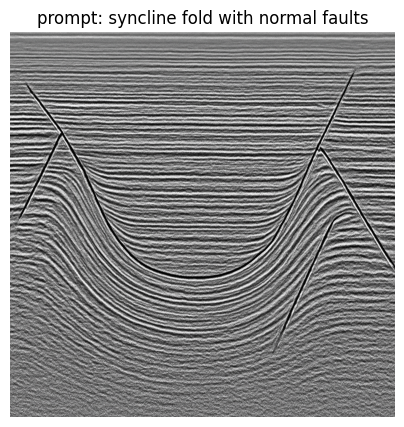

In [78]:
plt.figure(figsize=[5,5])
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.title(f'prompt: {prompt}')
plt.show()